In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping


Found 1006 images belonging to 10 classes.


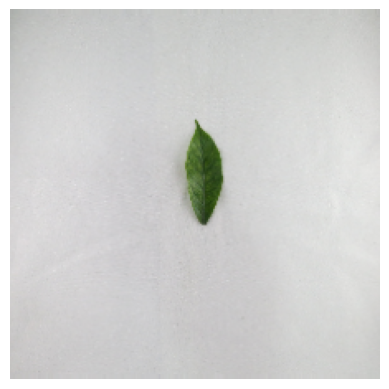

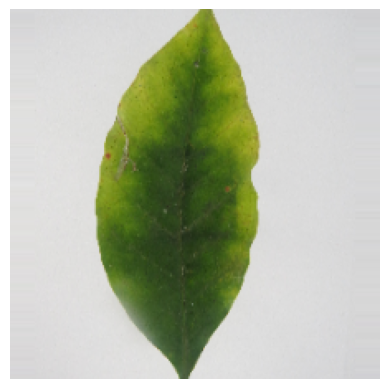

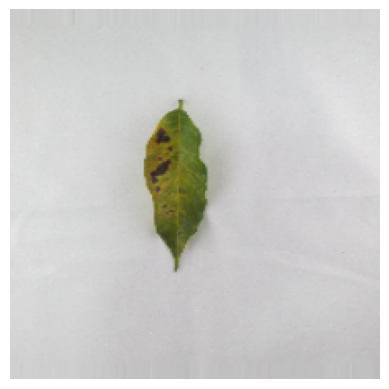

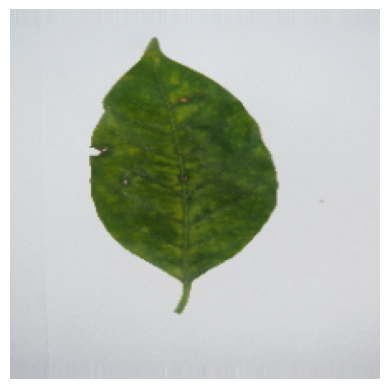

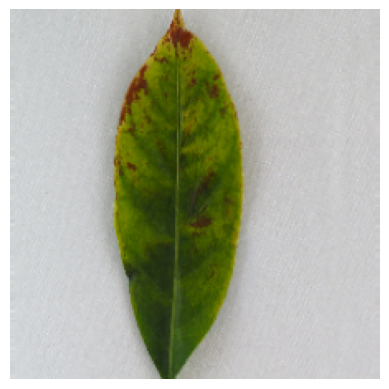

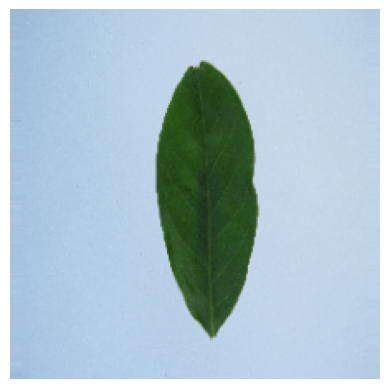

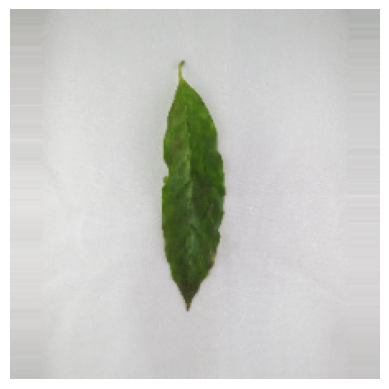

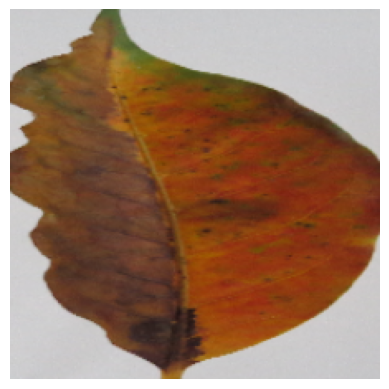

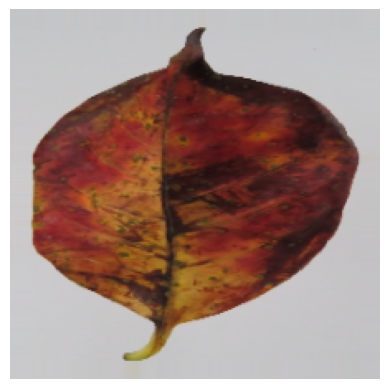

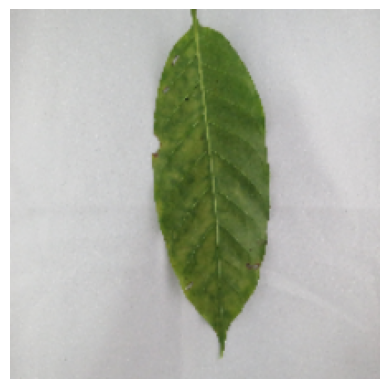

In [11]:
# Define dataset path
dataset_path = '/kaggle/input/prinom/CoLeaf DATASET'

# Image data generation
datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Zoom transformation
    horizontal_flip=True  # Horizontal flip
)

# Load and preprocess images
data = datagen.flow_from_directory(dataset_path, target_size=(224, 224), batch_size=1006)
images, labels = next(data)

# Display first 10 images
for i in range(10):
    plt.imshow(images[i])
    plt.axis('off')
    plt.show()


In [12]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Class labels
tags = data.class_indices
print(tags)


{'boron-B': 0, 'calcium-Ca': 1, 'healthy': 2, 'iron-Fe': 3, 'magnesium-Mg': 4, 'manganese-Mn': 5, 'more-deficiencies': 6, 'nitrogen-N': 7, 'phosphorus-P': 8, 'potasium-K': 9}


In [13]:
# Input layer
input_layer = Input(shape=(224, 224, 3))

# First convolutional block
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2))(x)

# Second convolutional block
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

# Third convolutional block
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

# Fully connected layers
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(len(tags), activation='softmax')(x)

# Define the model
model_custom = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model_custom.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [14]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# Train the model
history = model_custom.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=50,
    verbose=1,
    callbacks=[early_stopping]
)


Epoch 1/100
 2/13 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.1450 - loss: 3.2358

W0000 00:00:1716272217.141438     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 0.1606 - loss: 3.0211

W0000 00:00:1716272221.047413     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 348ms/step - accuracy: 0.1623 - loss: 2.9921 - val_accuracy: 0.2484 - val_loss: 2.0902
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.3016 - loss: 2.0266 - val_accuracy: 0.3354 - val_loss: 1.9183
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.3666 - loss: 1.8673 - val_accuracy: 0.3540 - val_loss: 1.7967
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.3602 - loss: 1.7961 - val_accuracy: 0.4224 - val_loss: 1.6781
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.4576 - loss: 1.5380 - val_accuracy: 0.4410 - val_loss: 1.5734
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.4636 - loss: 1.4923 - val_accuracy: 0.4286 - val_loss: 1.5317
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.5245 - loss: 1.3572 - val_accuracy: 0.4658 - val_loss: 1.4902
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.5634 - loss: 1.2586 - val_accuracy: 0.4783 - val_

In [15]:
# Evaluate the model
loss, accuracy = model_custom.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy}')

# Save the model
model_custom.save('Coffee_CustomCNN.h5')


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.4699 - loss: 1.6790
Test Accuracy: 0.5247524976730347


In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load the trained model
model = load_model('Coffee_CustomCNN.h5')

# Mapping of class indices to class labels (you might need to adjust this according to your dataset)
class_labels = {0: 'boron-B', 1: 'calcium-Ca', 2: 'healthy', 3: 'iron-Fe', 4: 'magnesium-Mg', 
                 5: 'manganese-Mn', 6: 'more-deficiencies', 7: 'nitrogen-N', 8: 'phosphorus-P', 9: 'potasium-K'}

# Function to preprocess the image
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Function to classify the image
def classify_image(image_path):
    img_array = preprocess_image(image_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    predicted_label = class_labels[predicted_class[0]]
    return predicted_label, np.max(predictions)

# Example usage
image_path = '/kaggle/input/prinom/CoLeaf DATASET/phosphorus-P/P (12).jpg'  # Replace with the path to your image
predicted_label, confidence = classify_image(image_path)
print(f"Predicted Class: {predicted_label}")
print(f"Confidence: {confidence:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
Predicted Class: boron-B
Confidence: 1.00


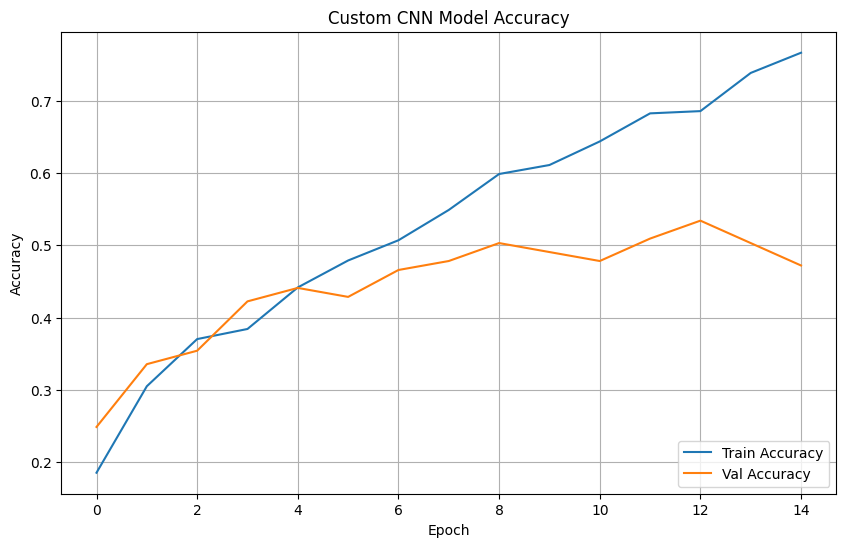

In [17]:
import matplotlib.pyplot as plt

# Assuming `history` is the history object returned from the model.fit() function
# and contains the accuracy and loss values for both training and validation sets.

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Custom CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Found 809 images belonging to 10 classes.
Found 197 images belonging to 10 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


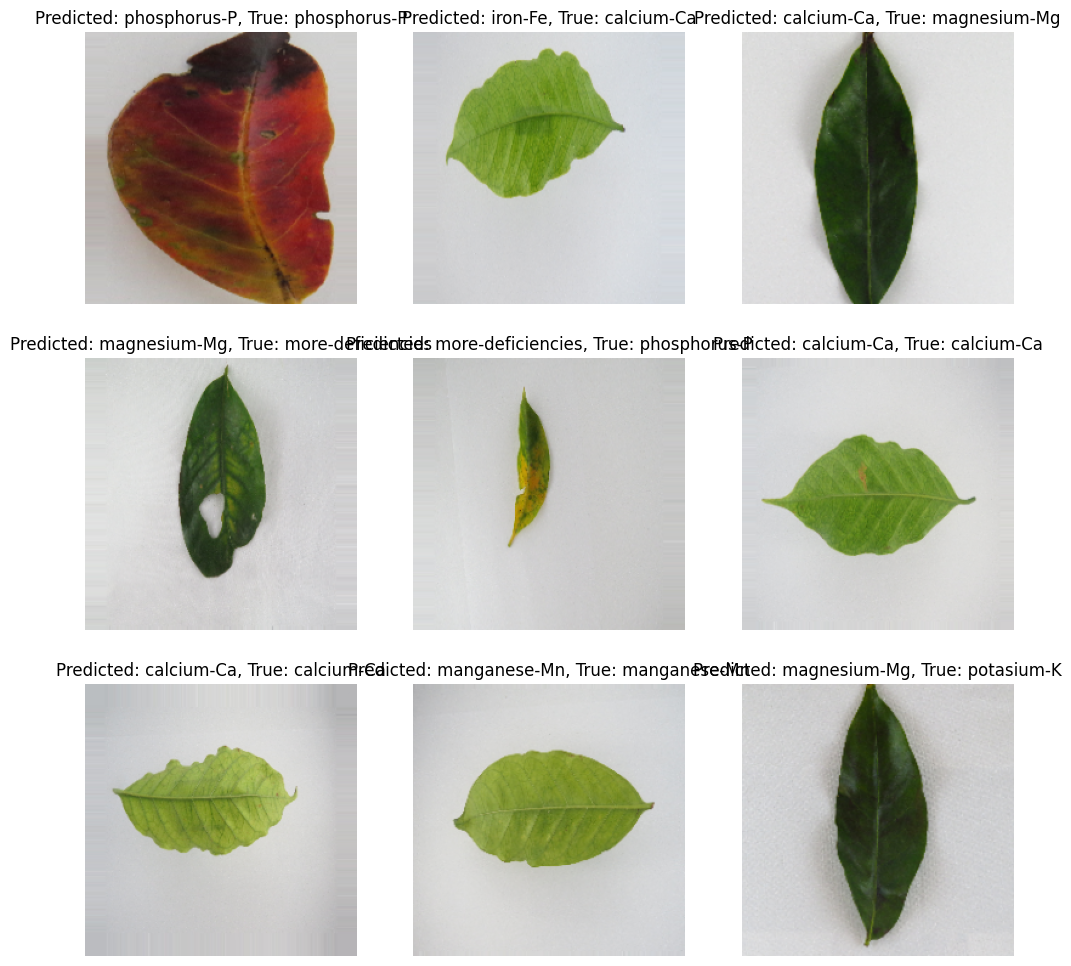

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset path
dataset_path = '/kaggle/input/prinom/CoLeaf DATASET'

# Image data generation
datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Zoom transformation
    horizontal_flip=True,  # Horizontal flip
    validation_split=0.2  # Using 20% of the data for validation
)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    subset='training'
)

validation_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    subset='validation'
)

# Load the trained model
model = load_model('Coffee_CustomCNN.h5')

# Mapping of class indices to class labels
class_labels = {v: k for k, v in train_data.class_indices.items()}

# Function to plot predictions
def plot_predictions(model, dataset, class_labels, num_images=9):
    plt.figure(figsize=(12, 12))
    
    images, labels = next(dataset)  # Get a batch of images and labels from the generator
    predictions = model.predict(images)
    
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        image = images[i]
        true_label = class_labels[np.argmax(labels[i])]
        predicted_label = class_labels[np.argmax(predictions[i])]
        plt.imshow(image)
        plt.title(f"Predicted: {predicted_label}, True: {true_label}")
        plt.axis("off")
    
    plt.show()

# Plot predictions using the custom CNN model
plot_predictions(model, validation_data, class_labels)
